# 연습문제: 로그 데이터 분석

다음 데이터는 깃허브 서비스에서 요일 별 사용자들의 푸시 횟수로, 요일별로 푸시 횟수가 다르다고 한다. 분산분석을 수행하여 검증하시오.

- 데이터파일 : log_push.csv

### 필요 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

%precision 5

'%.5f'

#### 분산분석을 위한 모듈들 임포트

In [54]:
plt.rcParams["font.family"] = 'Malgun Gothic'
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### 데이터 수집

In [3]:
df = pd.read_csv('data/log_push.csv')
df

,log_date,push_count
0,19-02-01,736729
1,19-02-02,511067
2,19-02-03,528724
3,19-02-04,709256
4,19-02-05,740087
...,...,...
343,20-01-10,1000151
344,20-01-11,729593
345,20-01-12,748161
346,20-01-13,1034195


### 데이터 기초 정보 파악

: 데이터 일부, 변수, 관측값수, 결측치 여부, 변수의 데이터타입, 기술통계량 등을 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   log_date    348 non-null    object
 1   push_count  348 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


### 데이터 가공

#### log_date컬럼을 이용하여 요일 컬럼(day_of_week) 생성

- log_date를 날짜형식으로 변경

In [5]:
# 날짜 데이터로 변환하기 위해 연도로 추정되는 앞에 20 추가해주기

In [6]:
df.log_date = '20' + df.log_date
df.log_date

0      2019-02-01
1      2019-02-02
2      2019-02-03
3      2019-02-04
4      2019-02-05
          ...    
343    2020-01-10
344    2020-01-11
345    2020-01-12
346    2020-01-13
347    2020-01-14
Name: log_date, Length: 348, dtype: object

In [7]:
df.log_date = pd.to_datetime(df['log_date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   log_date    348 non-null    datetime64[ns]
 1   push_count  348 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


In [8]:
df

,log_date,push_count
0,2019-02-01,736729
1,2019-02-02,511067
2,2019-02-03,528724
3,2019-02-04,709256
4,2019-02-05,740087
...,...,...
343,2020-01-10,1000151
344,2020-01-11,729593
345,2020-01-12,748161
346,2020-01-13,1034195


- log_date를 이용하여 요일 컬럼(day_of_week) 생성

In [9]:
df['day_of_week'] = df['log_date'].dt.day_name()
df

,log_date,push_count,day_of_week
0,2019-02-01,736729,Friday
1,2019-02-02,511067,Saturday
2,2019-02-03,528724,Sunday
3,2019-02-04,709256,Monday
4,2019-02-05,740087,Tuesday
...,...,...,...
343,2020-01-10,1000151,Friday
344,2020-01-11,729593,Saturday
345,2020-01-12,748161,Sunday
346,2020-01-13,1034195,Monday


- 요일 컬럼의 데이터를 범주형(Category)으로 변경 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   log_date     348 non-null    datetime64[ns]
 1   push_count   348 non-null    int64         
 2   day_of_week  348 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.3+ KB


In [11]:
# 카테고리 변환 후 메모리 8.3k => 6.3k
df = df.astype({'day_of_week':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   log_date     348 non-null    datetime64[ns]
 1   push_count   348 non-null    int64         
 2   day_of_week  348 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 6.3 KB


In [12]:
df2 = df[['day_of_week', 'push_count']]
df2

,day_of_week,push_count
0,Friday,736729
1,Saturday,511067
2,Sunday,528724
3,Monday,709256
4,Tuesday,740087
...,...,...
343,Friday,1000151
344,Saturday,729593
345,Sunday,748161
346,Monday,1034195


### 데이터 탐색 및 시각화

#### 요일별 빈도수

In [13]:
df.day_of_week.value_counts()

day_of_week
Friday       50
Monday       50
Saturday     50
Sunday       50
Tuesday      50
Thursday     49
Wednesday    49
Name: count, dtype: int64

#### 요일별 push수에 대한 기술통계량

In [14]:
df['push_count'].groupby(df['day_of_week']).describe()

C:\Users\Bert\AppData\Local\Temp\ipykernel_14644\2910439821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['push_count'].groupby(df['day_of_week']).describe()


,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Friday,50.0,897827.440000,68275.935770,660287.0,872606.25,906519.5,928941.00,1022900.0
Monday,50.0,955284.360000,70766.469732,709256.0,921506.75,954091.0,1004844.25,1087212.0
Saturday,50.0,657864.100000,46452.600564,511067.0,636199.75,653765.0,696757.50,738410.0
Sunday,50.0,689255.040000,51013.933708,528724.0,650460.50,695012.0,730139.75,766976.0
Thursday,49.0,952641.510204,118751.401232,286155.0,940762.00,963577.0,1008383.00,1109582.0
Tuesday,50.0,987446.620000,83908.212000,693257.0,960108.25,987347.5,1015885.00,1135921.0
Wednesday,49.0,971072.448980,102305.775606,570350.0,945094.00,985706.0,1029029.00,1121567.0


In [15]:
# 어떤 방식이 더 좋은지 비교해봄...
df2.groupby(by='day_of_week').describe()

C:\Users\Bert\AppData\Local\Temp\ipykernel_14644\1940308953.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby(by='day_of_week').describe()


push_count                                                     \
                 count           mean            std       min        25%   
day_of_week                                                                 
Friday            50.0  897827.440000   68275.935770  660287.0  872606.25   
Monday            50.0  955284.360000   70766.469732  709256.0  921506.75   
Saturday          50.0  657864.100000   46452.600564  511067.0  636199.75   
Sunday            50.0  689255.040000   51013.933708  528724.0  650460.50   
Thursday          49.0  952641.510204  118751.401232  286155.0  940762.00   
Tuesday           50.0  987446.620000   83908.212000  693257.0  960108.25   
Wednesday         49.0  971072.448980  102305.775606  570350.0  945094.00   

                                              
                  50%         75%        max  
day_of_week                                   
Friday       906519.5   928941.00  1022900.0  
Monday       954091.0  1004844.25  1087212.0  
Saturday     653765.0   696757.50   738410.0  
Sunday       695012.0   730139.75   766976.0  
Thursday     963577.0  1008383.00  1109582.0  
Tuesday      987347.5  1015885.00  1135921.0  
Wednesday    985706.0  1029029.00  1121567.0

#### 요일별 push수에 대한 박스플롯

C:\Users\Bert\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


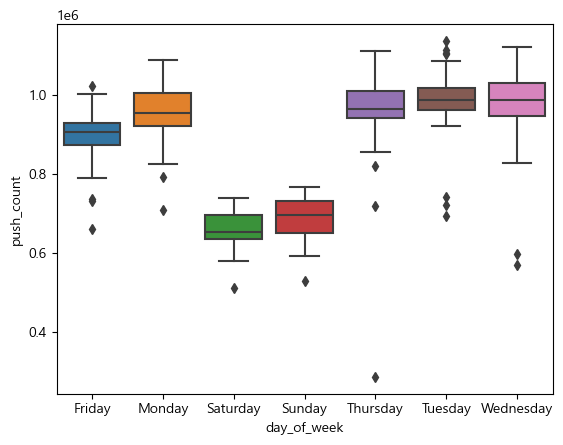

In [16]:
sns.boxplot(data=df, x='day_of_week', y='push_count')

plt.show()

#### push_count에 대한 요일별  히스토그램

- matplotlib을 이용하여 요일별 히스토그램을 한 윈도우에 겹쳐서 그리기

In [17]:
# 조금씩 밀리는거 수정해주고 변수 만드는거 반복문 코드 미완성

In [34]:
mon = df[df.day_of_week == 'Monday'].push_count
tue = df[df.day_of_week == 'Tuesday'].push_count
wed = df[df.day_of_week == 'Wednesday'].push_count
thu = df[df.day_of_week == 'Thursday'].push_count
fri = df[df.day_of_week == 'Friday'].push_count
sat = df[df.day_of_week == 'Saturday'].push_count
sun = df[df.day_of_week == 'Sunday'].push_count

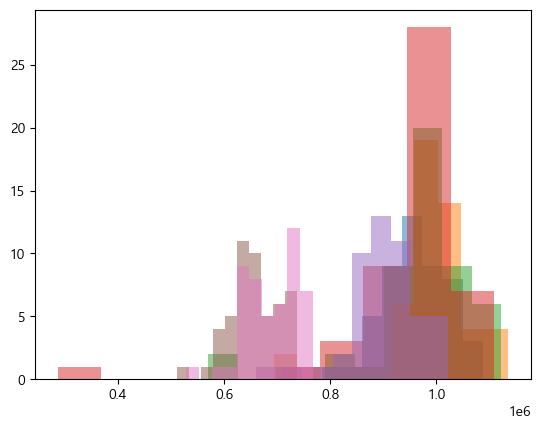

In [36]:
plt.hist(mon, alpha=0.5)
plt.hist(tue, alpha=0.5)
plt.hist(wed, alpha=0.5)
plt.hist(thu, alpha=0.5)
plt.hist(fri, alpha=0.5)
plt.hist(sat, alpha=0.5)
plt.hist(sun, alpha=0.5)


plt.show()

- seaborn을 이용하여 요일별 히스토그램 그리기

C:\Users\Bert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bert\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


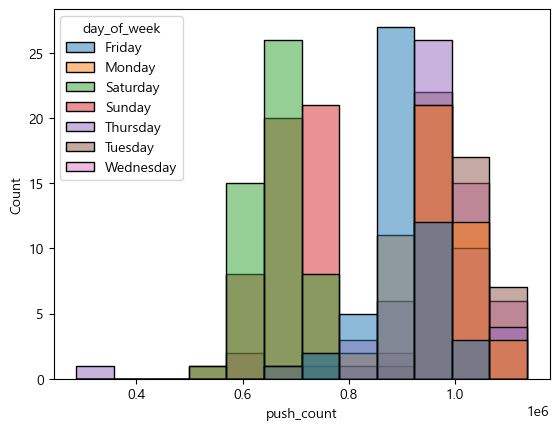

In [20]:
sns.histplot(x='push_count', hue='day_of_week', data=df)

plt.show()

### 이상치 탐색 및 제거

In [37]:
print(mon.quantile([0.25, 0.75]))

0.25     921506.75
0.75    1004844.25
Name: push_count, dtype: float64


In [38]:
def remove_outlier(x):
    quartile = x.quantile([0.25, 0.75])
    q1 = quartile[0.25]
    q3 = quartile[0.75]
    IQR = q3 - q1
    up = q3 + IQR*1.5
    lw = q1 - IQR*1.5
    return x[(x<=up) & (x>=lw)]

#### 이상치 제거 후 push_count의 요일별 박스플롯

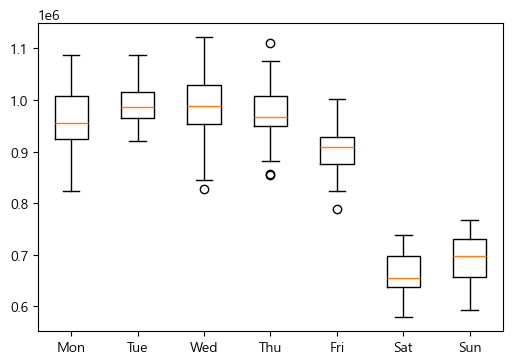

In [48]:
mon_o = remove_outlier(mon)
tue_o = remove_outlier(tue)
wed_o = remove_outlier(wed)
thu_o = remove_outlier(thu)
fri_o = remove_outlier(fri)
sat_o = remove_outlier(sat)
sun_o = remove_outlier(sun)

plt.figure(figsize=(6,4))
plt.boxplot([mon_o,tue_o,wed_o,thu_o,fri_o,sat_o,sun_o])
plt.xticks([1,2,3,4,5,6,7], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

In [49]:
wed_o.quantile([0.25, 0.75])

0.25     953277.5
0.75    1029843.5
Name: push_count, dtype: float64

In [41]:
wed.quantile([0.25, 0.75])

0.25     945094.0
0.75    1029029.0
Name: push_count, dtype: float64

In [40]:
wed.min()

570350

In [50]:
wed_o.min()

828340

## 일원분산분석

### 1. 가설 설정

### 2. 정규성 검정

- 원 데이터로 요일별 push_count의 정규성 검정

In [47]:
print(f'Mon = {stats.shapiro(mon)}')
print(f'tue = {stats.shapiro(tue)}')
print(f'wed = {stats.shapiro(wed)}')
print(f'thu = {stats.shapiro(thu)}')
print(f'fri = {stats.shapiro(fri)}')
print(f'sat = {stats.shapiro(sat)}')
print(f'sun = {stats.shapiro(sun)}')

Mon = ShapiroResult(statistic=0.9503620862960815, pvalue=0.03530443087220192)
tue = ShapiroResult(statistic=0.8026376962661743, pvalue=1.0089271427204949e-06)
wed = ShapiroResult(statistic=0.7955165505409241, pvalue=8.438798886345467e-07)
thu = ShapiroResult(statistic=0.6433736085891724, pvalue=1.169132346490187e-09)
fri = ShapiroResult(statistic=0.9204057455062866, pvalue=0.0024389552418142557)
sat = ShapiroResult(statistic=0.9624285101890564, pvalue=0.11236860603094101)
sun = ShapiroResult(statistic=0.9517913460731506, pvalue=0.04043339192867279)


- 이상치 제거한 데이터로 요일별 push_count의 정규성 검정

In [52]:
print(f'Mon = {stats.shapiro(mon_o)}')
print(f'tue = {stats.shapiro(tue_o)}')
print(f'wed = {stats.shapiro(wed_o)}')
print(f'thu = {stats.shapiro(thu_o)}')
print(f'fri = {stats.shapiro(fri_o)}')
print(f'sat = {stats.shapiro(sat_o)}')
print(f'sun = {stats.shapiro(sun_o)}')

Mon = ShapiroResult(statistic=0.9882591366767883, pvalue=0.9085348844528198)
tue = ShapiroResult(statistic=0.9531018137931824, pvalue=0.07741213589906693)
wed = ShapiroResult(statistic=0.9800050854682922, pvalue=0.5924699902534485)
thu = ShapiroResult(statistic=0.9782475829124451, pvalue=0.536057710647583)
fri = ShapiroResult(statistic=0.9857093095779419, pvalue=0.8369612097740173)
sat = ShapiroResult(statistic=0.9630802273750305, pvalue=0.12684005498886108)
sun = ShapiroResult(statistic=0.9575085639953613, pvalue=0.07481363415718079)


### 3. 등분산성 검정

In [53]:
stats.levene(mon_o,tue_o,wed_o,thu_o,fri_o,sat_o,sun_o)

LeveneResult(statistic=2.1706182771306146, pvalue=0.04555511566154481)

### 4. 분산분석 수행
- 가정 검정 결과에 맞게 분석을 수행하시오.

In [56]:
model = ols('push_count~C(day_of_week)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(day_of_week),6.0,5.808557e+12,9.680928e+11,147.947552,9.431775e-92
Residual,341.0,2.231329e+12,6.543486e+09,NaN,NaN


In [60]:
df

,log_date,push_count,day_of_week
0,2019-02-01,736729,Friday
1,2019-02-02,511067,Saturday
2,2019-02-03,528724,Sunday
3,2019-02-04,709256,Monday
4,2019-02-05,740087,Tuesday
...,...,...,...
343,2020-01-10,1000151,Friday
344,2020-01-11,729593,Saturday
345,2020-01-12,748161,Sunday
346,2020-01-13,1034195,Monday


### 5. 사후검정 수행

- 어느 요일간에 차이가 있는가?

In [59]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [61]:
comp = MultiComparison(df.push_count, df.day_of_week)
result = comp.allpairtest(stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
Friday,Monday,-4.1317,0.0001,0.0016,True
Friday,Saturday,20.5473,0.0,0.0,True
Friday,Sunday,17.3043,0.0,0.0,True
Friday,Thursday,-2.8226,0.0058,0.1214,False
Friday,Tuesday,-5.858,0.0,0.0,True
Friday,Wednesday,-4.1979,0.0001,0.0013,True
Monday,Saturday,24.8442,0.0,0.0,True
Monday,Sunday,21.5632,0.0,0.0,True
Monday,Thursday,0.1348,0.893,1.0,False
Monday,Tuesday,-2.0719,0.0409,0.859,False


In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [63]:
hsd = pairwise_tukeyhsd(df.push_count,  df.day_of_week)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Friday,Monday,57456.92,0.0079,9471.29,105442.55,True
Friday,Saturday,-239963.34,0.0,-287948.97,-191977.71,True
Friday,Sunday,-208572.4,0.0,-256558.03,-160586.77,True
Friday,Thursday,54814.0702,0.0145,6584.237,103043.9035,True
Friday,Tuesday,89619.18,0.0,41633.55,137604.81,True
Friday,Wednesday,73245.009,0.0002,25015.1757,121474.8422,True
Monday,Saturday,-297420.26,0.0,-345405.89,-249434.63,True
Monday,Sunday,-266029.32,0.0,-314014.95,-218043.69,True
Monday,Thursday,-2642.8498,1.0,-50872.683,45586.9835,False
Monday,Tuesday,32162.26,0.4242,-15823.37,80147.89,False


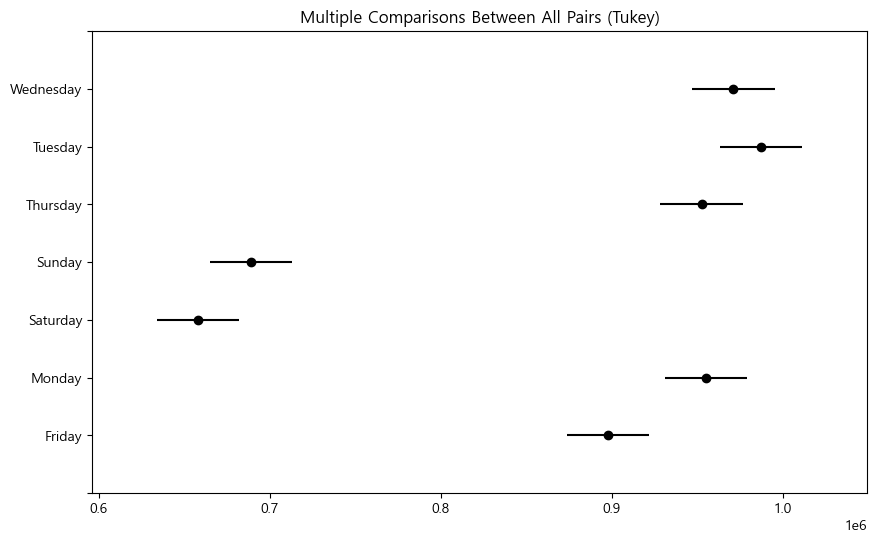

In [64]:
fig = hsd.plot_simultaneous()

(토요일,일요일) , (월요일,화요일,수요일,목요일)

----------------------------------